<a href="https://colab.research.google.com/github/PhuocPhat19146046/PhuocPhat19146046/blob/main/cifar10_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170508288/170498071 [==============================] - 4s 0us/step


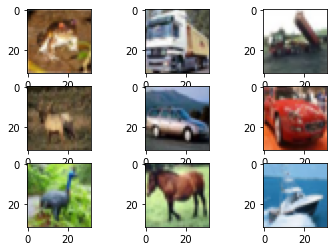

In [ ]:
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
#print(x_train.shape,'\n',y_train.shape)
#print(x_test.shape,'\n',y_test.shape)
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
from tensorflow import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers import Dense, Dropout, BatchNormalization, LSTM
from tensorflow.keras.optimizers import  SGD
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM, Flatten
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype('float')
x_test=x_test.astype('float')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512,activation='relu'))
model.add(Dense(784,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()
opt=SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=200,batch_size=64,
                  validation_data=(x_test,y_test),verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 784)               402192    
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
Total params: 1,983,418
Trainable params: 1,983,418
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
782/782 [==============================] - 12s 15ms/step - loss: 1.9160 - accuracy: 0.3180 - val_loss: 1.7930 - val_accuracy: 0.3610
Epoch 2/200
782/782 [==========

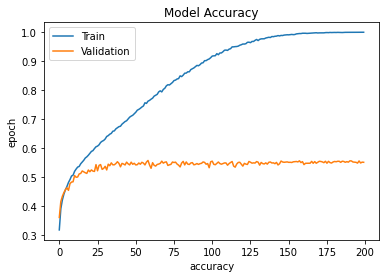

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
#model.save('drive/MyDrive/Colab Notebooks/model/cifar10_ANN.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_1=load_model('drive/MyDrive/Colab Notebooks/model/cifar10_ANN.h5')

Found 36 images belonging to 2 classes.


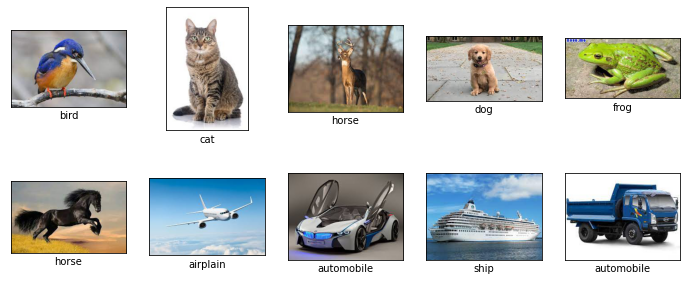

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
datagenerator=datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/data',
                                            target_size=(128,128),
                                            batch_size=5,interpolation="lanczos",
                                            shuffle=False)
cifar={0:'airplain',
       1:'automobile',
       2:'bird',
       3:'cat',
       4:'deer',
       5:'dog',
       6:'frog',
       7:'horse',
       8:'ship',
       9:'truck'}
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(io.imread(os.path.join(datagenerator.directory,datagenerator.filenames[i])))
    plt.xticks([])
    plt.yticks([])
    img=load_img('drive/MyDrive/Colab Notebooks/data/'+datagenerator.filenames[i],
                 target_size=(32,32))
    img=img_to_array(img)
    img=img.reshape(1,32,32,3)
    img=img.astype('float')
    img/=255
    plt.xlabel(cifar[np.argmax(model_1.predict(img))])
plt.show()